# Cluster Analysis

Cluster analysis is a multivariate statistical technique that groups observations on the basis some of their features or variables they are described by, such that:

    1. Examples within a cluster are similar (in this case, we speak of high intraclass similarity).
    2. Examples in different clusters are different (in this case, we speak of low interclass similarity)

Measuring the similarity/dissimilarity we can discover implicit patterns in the data in an unsupervised manner, even when no category label is provided. Cluster analysis helps us describe, analyze, and gain insight into the data. On the other hand, much of what we can learn from the data depends solely on our ability to interpret the results. That's why it is so important to understand the technique and how it works.

In this notebook we are mainly interested in the following topics:

    1. How to perform cluster analysis using the K-Means technique?
    2. How to find the optimal number of clusters?
    3. How to identify appropriate features?
    4. Why and when do we need standardize the data?
    5. Which are the pros and cons of using K-Means?
    6. How to interpret the results?

### Math Pre-requisites

In order to study and apply efficiently the K-means clustering method, we need to understand its underlying procedure. In other words, we must understand the mathematical approach behind the technique. We will define two concepts here, the **euclidian distance** and the concept of **centroid**.

______________
#### Euclidean distance

the Euclidean distance between two points $x$ and $y$ in a bidimensional space is the **length of the line** connecting them.

<img src='images/euclidean.png'>

As you can see from the figure, we can draw a triangle in the plane with the coordinate of the points. Consequently, the distance (the length of the blue line) is given by the Pythagoras' theorem. Therefore,

$$d(x,y)^2 = (y_1 - x_1)^2 + (y_2 - x_2)^2$$ 

where $x = (x_1,x_2)$ and $y = (y_1,y_2)$ are the coordinates of the points $x$ and $y$, respectively. The equation can be written in the following way

$$d(x,y) = \sqrt{(y_1 - x_1)^2 + (y_2 - x_2)^2}$$ 

analogously, we can also use this result for n-dimensional spaces. In this way, for $x = (x_1, x_2, ... , x_n)$ and $y = (y_1, y_2, ... , y_n)$

$$d(x,y) = \sqrt{(y_1 - x_1)^2 + (y_2 - x_2)^2 + ... + (y_n - x_n)^2}$$ 

_____________
#### Centroid

In mathematics and physics, the centroid or geometric center of a plane figure is the **arithmetic mean position** of all the points in the figure. For example, take 3 points, $a = (2, 1)$, $b = (3, 4)$ and $c = (4, 1)$. the centroid, $\alpha$, is given by 

$$\alpha = (\tfrac{2 + 3 + 4}{3},\tfrac{1 + 4 + 1}{3}) = (3, 2)$$

Maybe it will be easier if we visualize the points

<img src='images/centroid.png'>

This is a simple example but we can extend this result to more complex situations and any number of points.

## 1. K-Means Clustering

In this section, we will study the **K-Means Clustering model**. K-means algorithm divides a set of $n$ samples $X$ into $k$ disjoint clusters $c_i$, $i = 1, 2, ... , k$, each described by the mean $\mu_i$ of the samples in the cluster. The means are commonly called cluster _centroids_. The K-means algorithm assumes that all k groups have equal variance.

Roughly speaking, The K-means algorithm performs the following steps:

   1. Choose the number (K) of clusters
   2. Specify the cluster seeds (Define the initial position of the centroids)
   3. Assign each point to a centroid based in its proximity (if the centroid $\alpha$ is the nearest centroid to the point $p$, then assign $p$ to $\alpha$, do this for all points)
   4. Adjust the centroid (recalculate the position of each centroid based in the points assigned to them)
   5. Repeat step 3 and 4, until achieving a stop criterion
   6. After achieve a stop criteria, end execution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Example 1

We will start with a simple example. It is provided a dataset with geographical information of six countries. We will performing K-Means clustering in this dataset and interpret the results yielded by the model.

#### Load the data

In [2]:
country_data = pd.read_csv('datasets/Country clusters.csv')
country_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


The entries for the Latitude and Longitude columns correspond to the geographic centers of the countries of the dataset in decimal degrees unit. You can verify these values by entering the geographic centers of each country in a website like [latlong](https://www.latlong.net/).

Below, we plot the latitude and longitude coordinates by adjusting the scale for the x and y axis in order to appropriately represent the coordinates of the geographic centers of each country.

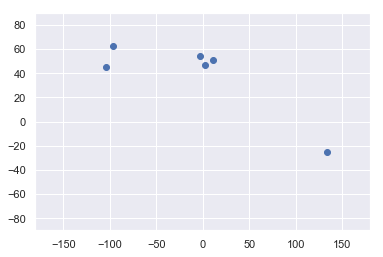

In [3]:
plt.scatter(country_data['Longitude'], country_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Our first Clustering will be performed using only the latitude and longitude as features. So, we need to slice the dataFrame containing the desired features and then apply the fit method to the model.

#### Clustering

In [4]:
# Slicing the data to get the Latitude and Longitude Columns
x = country_data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
# Instantiating a new model with 3 clusters
kmeans = KMeans(3)
clusters = kmeans.fit_predict(x)

In [6]:
data_with_clusters = country_data.copy()

# Assigning the cluster label of each country into the new dataFrame
data_with_clusters['Clusters'] = clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


#### Plotting and Interpreting the results

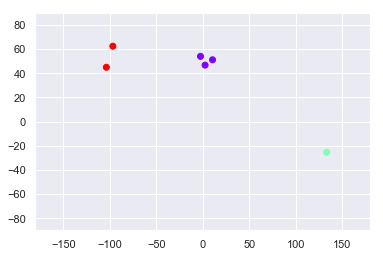

In [7]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=clusters, cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

We certainly accomplished a very interesting resulting here. As we defined a model with 3 clusters, the Kmeans model split the data into three clusters.

$C_0 =$ {Canada, USA}, $C_1 =$ {Australia} and $C_2 =$ {France, UK, Germany}.

We can interpret each cluster as a continent. As we only used the coordinates as features, the model assigned each country to its corresponding continent.

In [8]:
data_with_clusters['Continent'] = data_with_clusters['Clusters'].map({0: 'Europe', 1: 'Oceania', 2: 'North America'})
data_with_clusters = data_with_clusters.drop('Clusters', axis=1)
data_with_clusters

,Country,Latitude,Longitude,Language,Continent
0,USA,44.97,-103.77,English,North America
1,Canada,62.40,-96.80,English,North America
2,France,46.75,2.40,French,Europe
3,UK,54.01,-2.53,English,Europe
4,Germany,51.15,10.40,German,Europe
5,Australia,-25.45,133.11,English,Oceania


#### Changing the approach

Also, one could analyze the dataset with respect to the language column. As the language column records are object types, before fit the model we must map the languages names into numbers. So, Let's do it!

In [9]:
data_mapped = country_data.copy()
data_mapped['Language'] = country_data['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [10]:
# Slicing the dataframe, fitting and predicting
feature = data_mapped.iloc[:,3:4]
clusters = kmeans.fit_predict(feature)

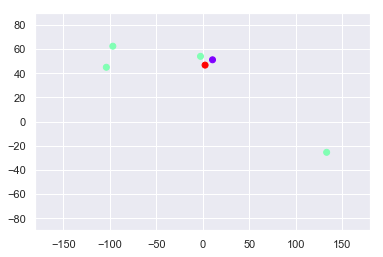

In [11]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=clusters, cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

This time our result was very distinct from the first one. Now the clusters do not represent the continent of a set of countries but the language spoken in each of them. This is expected as we used only the language as the only feature of the model.

### Example 2

Let's work in a more complex example. This time, we will perform K-Means in an artifical dataset just for practice purposes. First, we'll create 3 sample distributions:

In [12]:
MAXN = 40

data = np.concatenate([1.25*np.random.randn(MAXN, 2), 
                   5 + 1.5*np.random.randn(MAXN, 2)])
data = np.concatenate([data, [8, 3] + 1.2*np.random.randn(MAXN, 2)])

In [13]:
df = pd.DataFrame(data={'x' : data[:,0], 'y' : data[:,1]})

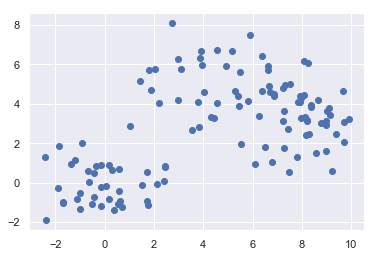

In [14]:
plt.scatter(df['x'], df['y'])
plt.savefig("Data Points")
plt.show()

Let us assume that we expect to have three clusters ($k = 3$) and apply the K-means commmand from the Scikit-Learn library. But before that, it is important to note that the algorithm may not ensure convergence to the global minimum. It can be
shown that K-means will always converge to a local minimum of the inertia, which is a topic that will be explored later.

The fact is that K-means performance depends on the random initialization of the seeds, but some seeds
can result in a poor convergence rate, or convergence to suboptimal clustering. To alleviate the problem of local minima, the K-means computation is often performed several times, with different centroid initializations. One way to address this issue is the k-means++ initialization scheme, which has been implemented in Scikit-Learn (use the init=’kmeans++’ parameter). This parameter initializes the centroids to be (generally) far from each other, thereby probably leading to better results than random initialization. You just need to care about initialization if you are using another package different from Scikit-Learn.

Time to code!

In [15]:
kmeans = KMeans(init = 'k-means++', n_clusters = 3)
clusters = kmeans.fit_predict(df)

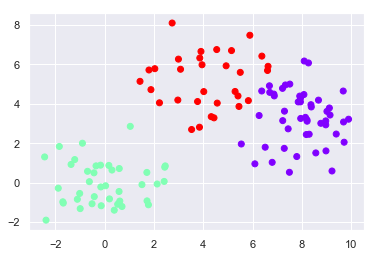

In [16]:
plt.scatter(df['x'],df['y'], c=clusters, cmap='rainbow')
plt.show()

There it is! The result looks great, we can clearly see three different classes in the scatter plot.

In [17]:
df['Clusters'] = clusters
df.head()

,x,y,Clusters
0,-0.348645,0.850707,1
1,-0.419202,-0.709663,1
2,0.584881,-0.448984,1
3,-0.509601,-1.071689,1
4,0.171620,0.873031,1


In [18]:
df['class'] = df['Clusters'].map({0:'blue', 1:'green', 2:'red'})
df = df.drop('Clusters', axis=1)
df.head()

,x,y,class
0,-0.348645,0.850707,green
1,-0.419202,-0.709663,green
2,0.584881,-0.448984,green
3,-0.509601,-1.071689,green
4,0.171620,0.873031,green


## 2. How to choose the number of clusters?

The K-means algorithm solves the following minimization problem:
    
$$arg min_c \sum_{j=1}^k {\sum_{x \in c_j} {d(x,\mu_j)}}$$

Where $k$ is the number of clusters, $c_i$ is the set of points that belong to cluster $i$ and $\mu_i$ is the centroid of the class represented by $c_i$. This equation tell us that the k-means aims to minimize the distance between each point and the centroid representing its cluster. It can be shown that this is equivalent to maximize the distance between clusters. You can learn more about this in the [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering) website.

K-means clustering objective function uses the square of the Euclidean distance $d(x, \mu_j)$, which is the euclidean distance equation already defined in the pre-requisite section. It is also referred to as the _inertia_ or _within-cluster sum-of-squares_. 

From the definition of **inertia**, arises a problem. Take the first example. There we had 6 countries, say we try to run the algorithm again on that problem, this time with 6 clusters. Fatally, each of the 6 centroids will coincide with each point coordinate. This means that the distance between points in a cluster and its centroid will be zero. This implies that the inertia will also be zero!

This should make us happy because we reached the minimum zero, in other words, we solved the minimization problem! But there is no point in set the number of clusters equals to the number of data points. Imagine this same case to a thousand data points!

The purpose of using K-means is to identify patterns in the data and divide the data that share similarities to fit into these patterns. So, let's it's is obvious that the number of clusters $c_i$ will always be less than the number of points. Mathematically, if $c_i$ represents the number of clusters and $n$ the number of points, then $i < n$. Similarly, if we use only one cluster, then all data will be classified as being of that unique class, this is another useless solution! Therefore, $1 < i < n$.

### The Elbow Method

The best number of clusters is the one that provides the minimum inertia value with just a few clusters. Let's take the dataset of the example 2 and plot a graph of the inertia _vs_ the number of clusters.

In [19]:
# drop the class column in order to have only the features in df
new_df = df.copy()
new_df = new_df.drop('class', axis=1)

# empty list for inertia values
inertia = []

for i in range(1,10):
    # instantiating a kmeans model with i clusters
    kmeans = KMeans(n_clusters=i)
    
    # fitting the model to the data
    kmeans.fit(new_df)
    
    # appending the inertia of the model to the list
    inertia.append(kmeans.inertia_)
    
    # ignore this if statement
    if i == 3:
        elbow = kmeans.inertia_

# creating a list with the number of clusters
number_of_clusters = range(1,10)

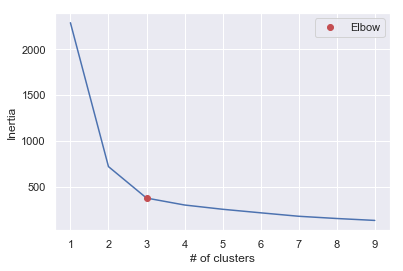

In [20]:
plt.plot(number_of_clusters, inertia)
plt.plot(3, elbow, 'ro', label='Elbow')
plt.legend()
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

The graph yiels an interesting result. Let's first remember that the data was created based on three diferent sample distributions. From the graph, the inertia drops at an extremely high rate in the beggining. At some point it reaches the **elbow** (# of clusters equals to 3) and then there is no significant change in the inertia value from there on. 

The elbow method consists in adopt the number of clusters representing the elbow of this graph. Therefore, the ideal number of clusters for this problem is 3.

## 3. Standardization

Imagine you have a dataset which consists of house prices (in dollars), sizes (in squared feet), and number of rooms. Therefore, each feature assumes values in a very distinct range. You want to split this dataset into clusters in order to identify different classes of houses.

We already saw that the K-Means algorithm depends on the concept of distance between observations we're trying to cluster. Given that the house prices are on a much larger scale than the other variables, when K-Means calculate the "distance" of the points, this variable will overly influence the algorithm.

Without some sort of standardization, the algorithm will depends only on the prices variable.

The most common method applied to standardize variables is subtracting their mean and dividing by their standard deviation. This implies that the variables will have zero mean and unit variance. When the distribution of the variables aren't terribly skewed, this works fine. But for the case when we have many outliers, it becomes a better approach to substitute the standard deviation for the interquartile range, i. e. $Q_3 - Q_2$. By doing this, we avoid that outliers dramatically influence the algorithm. The same strategy can be applied to the mean. When we have many outliers, the median, which is a central tendendy measure, is not influenced by those outliers. Hence, it is safer to use the median.

Summarying, you must judge if it is necessary or not standardizing variables. Assuming a normal distribution and no outliers, it is safe to standardize the variables using their mean and standard deviation. Conversely, if the data distribution is highly skewed and it presents many outliers, you can remove the outliers or standardize the variables using the median and the interquartile range.

## 4. K-Means Pros and Cons

Now let's have a look at the Pros and Cons of K-Means. The pros are already known to you even if you didn't realize it yet.

##### Pros

    1. Simple to understand
    2. Fast to cluster
    3. Widely Available (there are several packages that implement K-Means)
    4. Easy to implement 
    5. Always yields a result (also a con, as it may be deceiving)

#### Cons

    1. We need to choose the number of clusters (remedy: elbow method)
    2. It is sensitive to initialization (remedy: kmeans++)
    3. Sensitive to outliers (remedy: remove outliers)
    4. Standardization

## 5. Case Study: Customer Segmentation

### Context

In order to make significative decisions about their marketing strategies, it is essential for marketers to know the profile of their customers. Informations like how the customers spend their money, their level of satisfaction and loyalty helps a great deal when defining new strategies to attract more audience.

In other words, knowing exactly what your customers want helps you to make the right kind of promotional, marketing and product development strategies.

### The dataset and our objective

For visualization purposes, the dataset consists of 2 columns, one with measures of the satisfaction of the customers and another with measures of the loyalty of the each customer. We'll analyze the dataset and after a short exploratory data analysis, we'll split the data into cluster using the K-Means method. By doing this, we hope to identify the different classes of customers from a shop and trace their behavior in order to get some insights about what we can possibly do to increase the sales of the shop.

Now, let's introduce the dataset. Each row represents a customer that attended the shop in the last 8 months. There are 50 observations. The column satisfaction consists of values in a range from 0 to 10, where 10 means extremely satisfied. The data were collected directly from the customers. The second column, was destined to store the loyalty measure of the customers. Considering the number of purchases that the customer did in the shop in the last 8 months, and also other factors, it was assigned a value for each customer between -3 and 3, where 3 indicates that the customer is extremely loyal while -3 indicates that the customer is not likely to buy again in the shop.

### Exploratory data analysis

In [21]:
data = pd.read_csv('datasets/customer_information.csv')

In [22]:
data.head()

,Satisfaction,Loyalty
0,2,-0.307216
1,9,1.873477
2,5,0.136080
3,6,2.392349
4,1,-0.801104


In [23]:
data.describe()

,Satisfaction,Loyalty
count,50.000000,50.000000
mean,4.260000,0.056036
std,2.640424,1.389904
min,0.000000,-2.545921
25%,2.000000,-0.890733
50%,4.500000,0.015094
75%,6.750000,1.086496
max,9.000000,2.971337


The one conclusion we can extract from the table is that the average satisfaction does not seems good. The value 4.26 indicates that the customers are not satisfied with the shop. On the other hand, an average of 0.056 for the loyalty column indicates that the customers are moderately loyal to the shop.

This could be a situation where the shop is in a remote area and does not provides a very satisfactory service but still have some faithful customers because of the convenience of being situated near them.

C:\Users\alexa\Anaconda3\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Loyalty / Satisfaction')

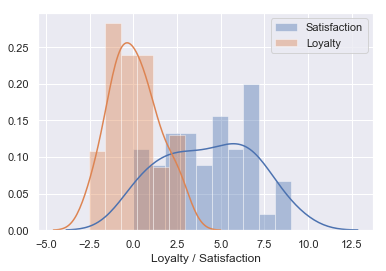

In [24]:
sat = sns.distplot(data['Satisfaction'], bins=10, label='Satisfaction')
loy = sns.distplot(data['Loyalty'], label='Loyalty')
plt.legend()
plt.xlabel('Loyalty / Satisfaction')

The data does not presents high skewness, therefore, we will not need to apply any treatement with respect to its distribution. At least, not yet.

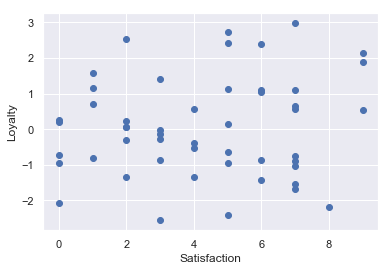

In [25]:
plt.subplot()
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Will we need standardization?

Now we are free to cluster the data. Let's begin with a simple case. As we do not know much about the data yet, we will divide it into two clusters and try to get some insights from the results.

In [26]:
# kmeans with two clusters
kmeans = KMeans(2)
clusters = kmeans.fit_predict(data)

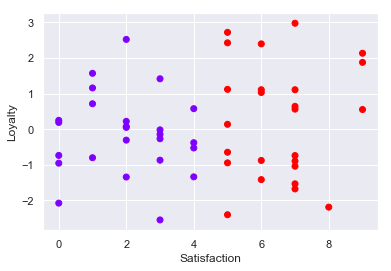

In [27]:
plt.scatter(data['Satisfaction'],data['Loyalty'], c=clusters, cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

Certainly, there are many ways to split the data into two cluster. But have a look at the results, imagine a vertical line separating the red points from the blue points. It is easy to see that the algorithm divided the data into two classes, where the blue class are for the customers less satisfied and the red class are for those customers more satisfied.

Well, doesn't it consider the loyalty values? Apparently not! That's due to the fact that the two variables are in a distinct scale. The satisfaction values are significantly greater than the loyalty feature values. Thus, we need to apply _standardization_ to the Satisfaction variable. This can also be seen in the distribution plot previously shown. Also, we can conclude that from the average values of each feature.

There two ways of doing standardization. We could simply use the sklearn library or doing it by subtracting each column by its mean and dividing by its standard deviation. Let's do it in both ways so we can grasp the concept.

In [28]:
# PERFORMING STANDARDIZATION MANUALLY
scaled_data = data.copy()

sat_avg = scaled_data['Satisfaction'].mean()
sat_std = scaled_data['Satisfaction'].std()
scaled_data['Satisfaction'] = (scaled_data['Satisfaction'] - sat_avg)/sat_std

loy_avg = scaled_data['Loyalty'].mean()
loy_std = scaled_data['Loyalty'].std()
scaled_data['Loyalty'] = (scaled_data['Loyalty'] - loy_avg)/loy_std

In [29]:
scaled_data.head()

,Satisfaction,Loyalty
0,-0.855923,-0.261350
1,1.795167,1.307602
2,0.280258,0.057590
3,0.658985,1.680917
4,-1.234650,-0.616689


In [30]:
# PERFORMING STANDARDIZATION WITH SKLEARN
from sklearn import preprocessing

scaled_data = preprocessing.scale(data)
print(scaled_data[0:5,0:5])

[[-0.86461307 -0.26400362]
 [ 1.81339202  1.32087735]
 [ 0.2831034   0.05817446]
 [ 0.66567555  1.69798229]
 [-1.24718523 -0.62295034]]


C:\Users\alexa\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


The results are not exactly equal because sklearn apply some special procedures in order to improve the algorithm efficiency. From now on, we'll be using the data scaled by sklearn.

In [31]:
std_data = pd.DataFrame({'Scaled satisfaction':scaled_data[:,0], 'Scaled loyalty':scaled_data[:,1]})
std_data.head()

,Scaled satisfaction,Scaled loyalty
0,-0.864613,-0.264004
1,1.813392,1.320877
2,0.283103,0.058174
3,0.665676,1.697982
4,-1.247185,-0.622950


C:\Users\alexa\Anaconda3\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Scaled satisfaction / Loyalty')

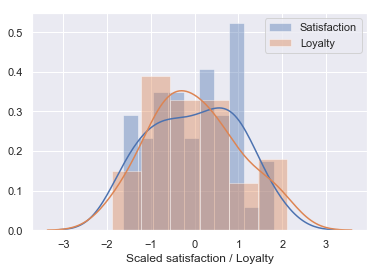

In [32]:
sat_scaled = sns.distplot(std_data['Scaled satisfaction'], bins=10, label='Satisfaction')
loy_scaled = sns.distplot(std_data['Scaled loyalty'], label='Loyalty')
plt.legend()
plt.xlabel('Scaled satisfaction / Loyalty')

Great! Now we are good to go!

## Clustering

Now that the data is scaled, we can apply the K-Means algorithm with different numbers of clusters and try to figure out what the results are telling us. Before anything, let's define a function that has 2 arguments: the number of cluster, k, and the data which we will use for clustering. This function will perform the clustering and we will discuss the results yielded from it.

Although the data were standardized, all plots will be in the original scale so we can interpret the results in a clearly manner.

In [33]:
def clust(k, std_data):
    kmeans = KMeans(k)
    clusters = kmeans.fit_predict(std_data)
    plt.scatter(data['Satisfaction'], data['Loyalty'], c=clusters, cmap='rainbow')

    plt.xlabel('Satisfaction')
    plt.ylabel('Loyalty')

    plt.show()

### 2 Clusters

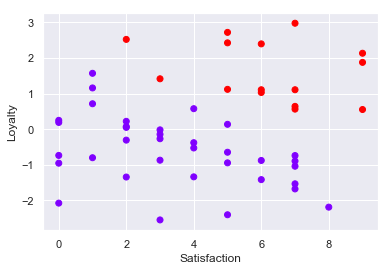

In [34]:
clust(2, std_data)

Now that the variables are standardized, the algorithm behaved differently. Now we can identify two classes, one for the loyal and satisfied customers and another one for the unsatisfied and not loyal customers. It is important to name the clusters. Let's call the customers of the first cluster of **engaged** and the customers of the second one of **alienated**.

### 3 Clusters

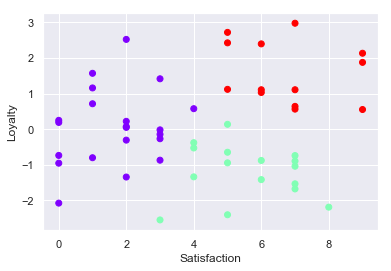

In [35]:
clust(3, std_data)

This time we can identify three groups. The engaged and the alienated clusters are still there, but there is another one. The new cluster consists of customers that are satisfied but are not loyal ones. We will call the customers of this group as **pleased**.

### 4 Clusters

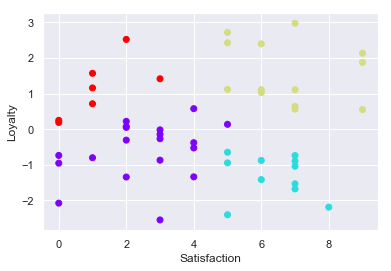

In [36]:
clust(4, std_data)

Superb! now the alienated cluster was split into two. Let's keep calling the not loyal and not satisfied customers as alienated. The new cluster consists of loyal customers that did not have a good experience shopping, let's call them **supporters**. How we can use this result in real life?

The four clusters are:
    
    1. Alienated
    2. supporters
    3. pleased
    4. engaged

When designing the strategy for the shop, we ultimately want to get as many people as possible to be engaged. We want them to be both satisfied and loyal!

In order to turn the supporters into engaged, we must increase their shopping satisfaction. Well, considering that the supporters are loyal, why should we invest our effort in them? The fact is that the supporters are as close to becoming engaged as to becoming alienated. If we don't address their feedback, we may lose them as clients.

Thus, it is crucial to increase the shopping satisfaction of the supporters. Let's think about some possible action steps:

    We could see if the shop provides a nice environment for shopping. For example, it is very common to have huge queues to pay in those establishments. One solution, in this case, would be increase the number of cashiers or accelerate the process in some other way. By doing this, as we are addressing the feature of satisfaction, besided have supporters transiting to the engaged cluster, we could also have some alienated customers moving to the pleased group.
    
The pleased are satistified but not loyal:

    In order keep them visiting the shop, we could introduce loyalty programs, discount vouchers or even raffles! In this case, we could even move some customers from the alienated cluster to the supporters clusters. They won't necessarily be more satisfied, but they will be more loyal.
    
Finally, it does not make sense to address the alienated group first as they are too far away from the engaged. By default, they are not likely to even enter the shop as they already are dissatisfied and disloyal.

Is there something more that we can do? Surely! We could study more about the engaged customers and collect more data about them, like age, gender and income. This way, we could target other people with the same profile in our ad campaigns in order to obtain more engaged customers! That's sound amazing!
    

## What is the best number of clusters?

Until now, we just tried many models but did not try to define which one is the best. We could try to address this problem earlier, but we did not followed this path because we were just exploring the data. Let's apply the elbow method and see how many clusters can give us a good segmentation of our data.

In [37]:
inertia = []

for i in range(1,10):
    # instantiating a kmeans model with i clusters
    kmeans = KMeans(n_clusters=i)
    
    # fitting the model to the data
    kmeans.fit(std_data)
    
    # appending the inertia of the model to the list
    inertia.append(kmeans.inertia_)

# creating a list with the number of clusters
number_of_clusters = range(1,10)

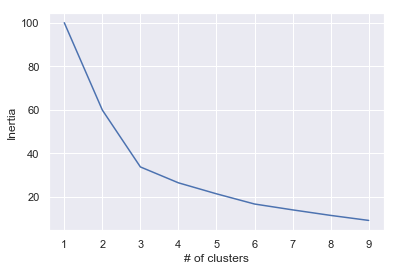

In [38]:
plt.plot(number_of_clusters, inertia)
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

Well, by just looking at the plot, we can infer that 4 clusters seems to nicely segment our data. I encourage you to build a model with 5 or more clusters and see the results for yourself.

## 6. Final Considerations

In this notebook, we saw how we can arrive at meaningful insights and recommendations by segmenting customers data into clusters. We studied the underlying procedures of the K-Means clustering technique and what kind of errors can arise when we do not analyze our dataset before clustering. 

In addition, we saw how we can determine the right number of clusters for a model using the elbow method. Besides, we explored what is and why we eventually need to standardize our data in order to make all features significant to the model.

At the last section, we also explored a case study with an artificial dataset. For the sake of simplicity, the dataset used only 2 variables — customer satisfaction and loyalty. Tipically, in a business scenario we have many more variables to analyze and feed our model. Thus, much more realistic and business-specific insights can be derived from such situations.

-------
I believe that now it is already clear that Clustering is a powerful tool for data analysis. Most commonly, data scientists use clustering in the exploratory data analysis step in order to get acquainted with the data, searching for patterns and determining what methods can be used to investigate further.

I would like to thank you for your patience and I want to say that I highly apreciate your efforts to be at this point. Keep studying and if you have some doubts, tips or new ideas for this work, please, contact me!

Happy Clustering!

#### Bonus section - Building an animation for Example 2

In [39]:
df.head()

,x,y,class
0,-0.348645,0.850707,green
1,-0.419202,-0.709663,green
2,0.584881,-0.448984,green
3,-0.509601,-1.071689,green
4,0.171620,0.873031,green


In [40]:
df.drop(columns=['class'],axis=1, inplace=True)

C:\Users\alexa\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\Users\alexa\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\Users\alexa\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\Users\alexa\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\Users\alexa\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\cluster\k_m

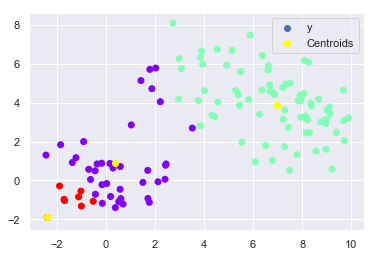

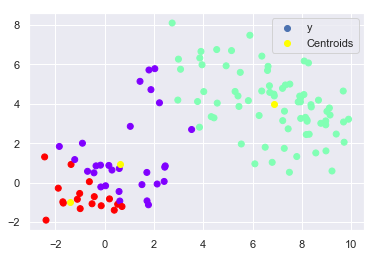

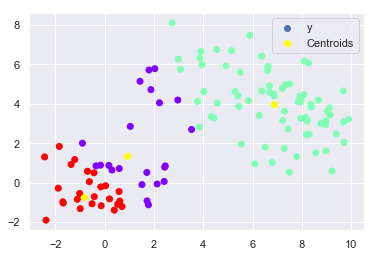

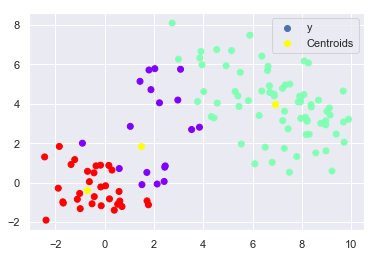

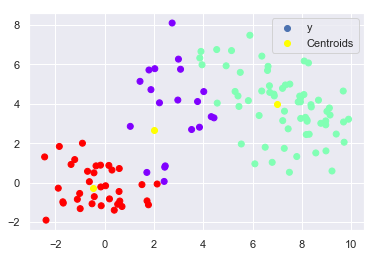

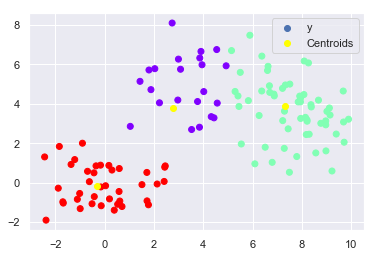

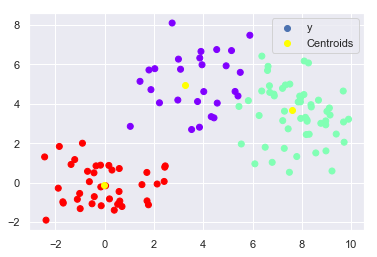

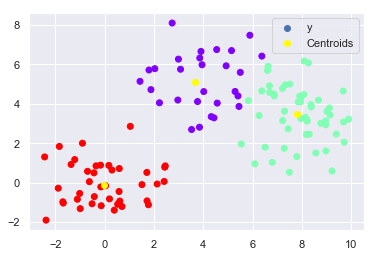

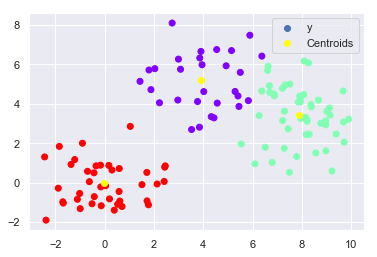

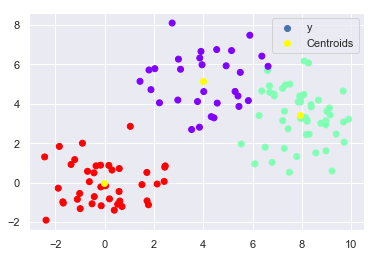

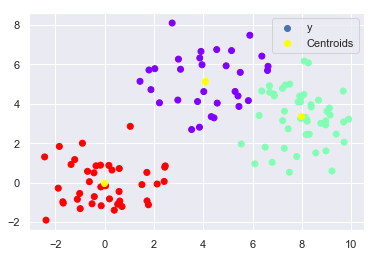

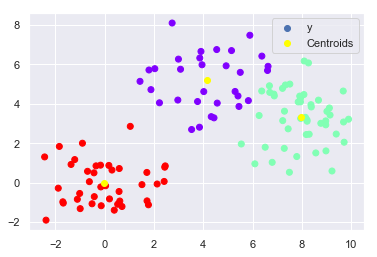

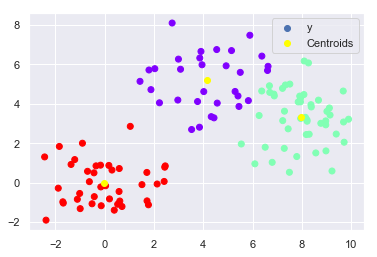

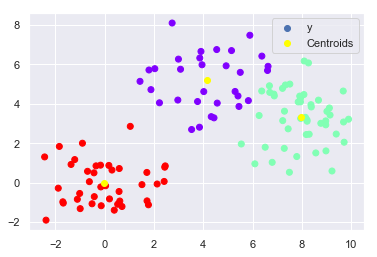

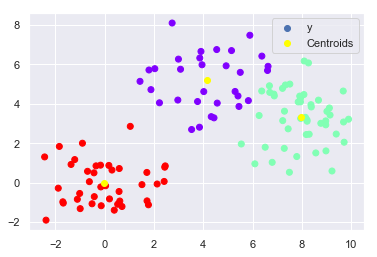

In [41]:
centers_i = []
labels_i = []

init_c = np.array([[0, 4],
          [6, 4],
          [-2, 6]])

for i in range(0,15):
    kmeans = KMeans(n_clusters=3, init=init_c,max_iter=i+1)
    clusters = kmeans.fit_predict(df)
    labels_i.append(kmeans.labels_)
    centers_i.append(kmeans.cluster_centers_)
    
    fig = plt.figure()
    axs = fig.add_subplot(111)
    
    axs.scatter(df['x'],df['y'], c=clusters, cmap='rainbow')
    axs.scatter(centers_i[i][:,0], centers_i[i][:,1], c='yellow', label='Centroids')
    plt.legend()
    
    plt.savefig("fig{0}.png".format(i+1))

# Once you have all 15 figures, you can use another app to construct a .gif file or even a video.